# Air Quality Prediction

In [252]:
#import all necessary libraries
import numpy as np 
import pandas as pd 
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

In [253]:
#importing the train and test dataset
df = pd.read_csv('Train.csv')
df2 = pd.read_csv('Test.csv')
df.head()

,feature_1,feature_2,feature_3,feature_4,feature_5,target
0,0.293416,-0.945599,-0.421105,0.406816,0.525662,-82.154667
1,-0.836084,-0.189228,-0.776403,-1.053831,0.597997,-48.897960
2,0.236425,0.132836,-0.147723,0.699854,-0.187364,77.270371
3,0.175312,0.143194,-0.581111,-0.122107,-1.292168,-2.988581
4,-1.693011,0.542712,-2.798729,-0.686723,1.244077,-37.596722


#### Check for Missing Values

In [254]:
df.isnull().sum()

feature_1    0
feature_2    0
feature_3    0
feature_4    0
feature_5    0
target       0
dtype: int64

In [255]:
df2.isnull().sum()

feature_1    0
feature_2    0
feature_3    0
feature_4    0
feature_5    0
target       0
dtype: int64

No missing values in either dataset, both are clean.

In [256]:
df.shape

(1600, 6)

## Analysing Numerical Features

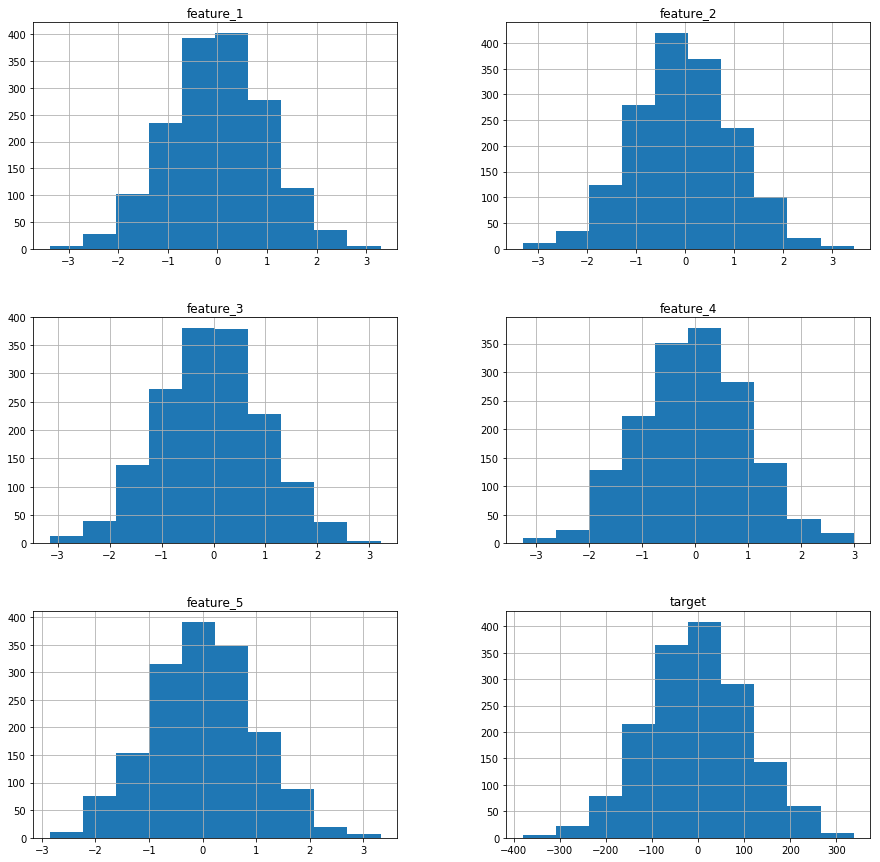

In [257]:
# Distribution of numerical data
plt.rcParams['figure.figsize'] = [15,5]
df.hist(figsize=(15,15))
plt.show()

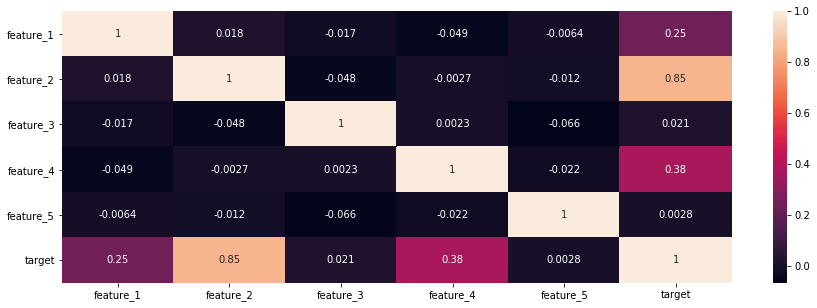

In [258]:
# Finding correlation between different features
sns.heatmap(df.corr(method='spearman'),annot=True)

1. Feature_2 has a good correlation with the target variable at 0.85 followed by feature_4 at 0.38
2. None of the features have good relationship with each other.

In [275]:
data = df.append(df2)

In [278]:
# Setting the target variable
y = data.target

In [279]:
# Dataset to be used for prediction
X = data.loc[:, data.columns !='target']
X = data[features]
X.head()

,feature_1,feature_2,feature_3,feature_4,feature_5
0,0.293416,-0.945599,-0.421105,0.406816,0.525662
1,-0.836084,-0.189228,-0.776403,-1.053831,0.597997
2,0.236425,0.132836,-0.147723,0.699854,-0.187364
3,0.175312,0.143194,-0.581111,-0.122107,-1.292168
4,-1.693011,0.542712,-2.798729,-0.686723,1.244077


## Linear Regression Model

In [280]:
# Splitting data into two, test and train
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=1) 

In [281]:
# Implementing Linear Regression Model with multiple variables for prediction 
from sklearn.linear_model import LinearRegression
reg = LinearRegression(fit_intercept=True)
model = reg.fit(x_train,y_train)
prediction = model.predict(x_test)

In [282]:
# Calculating R-squared value for the model
from sklearn.metrics import r2_score
r2_score(y_test, prediction)

0.9689475553675861

In [283]:
# Calculating Mean Squared Error for the model
from sklearn.metrics import mean_squared_error
mean_squared_error(y_test, prediction)

424.6032963996916

## Plot for the Model

400


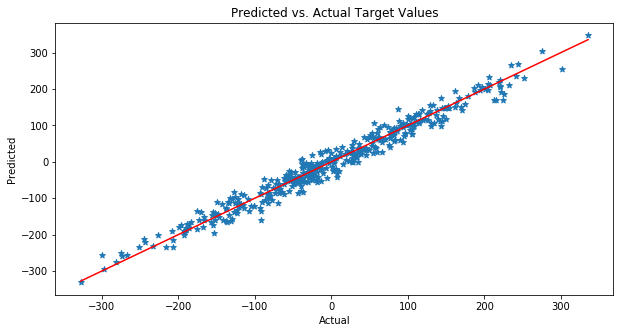

In [284]:
plt.figure(figsize=(10, 5))
plt.scatter(y_test, prediction,marker='*')
print(prediction.size)
plt.title('Predicted vs. Actual Target Values')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)],'r')

In [285]:
output = pd.DataFrame({'target': prediction})
output.to_csv('predictions.csv', index=False)

## Cross- Validation

In [286]:
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer

my_pipeline = Pipeline(steps=[('preprocessor', SimpleImputer()),
                              ('model', LinearRegression(fit_intercept=True))])

In [287]:
from sklearn.model_selection import cross_val_score
scores =  cross_val_score(my_pipeline, X, y,cv=5,scoring='r2') #specify scoring as r2 for r-squared

In [288]:
print(scores)

[0.96235629 0.96941757 0.96700343 0.96433061 0.96914884]


In [289]:
print(scores.mean())

0.9664513491196602


R-squared values for cross validation and our previously predicted model is almost the same.

In [290]:
from sklearn.model_selection import cross_val_score

scores = -1 *  cross_val_score(my_pipeline, X, y,cv=5,scoring='neg_mean_squared_error')
print(scores.mean())

414.4091627693877


The Mean Squared Error reduces slightly in this model.

2000


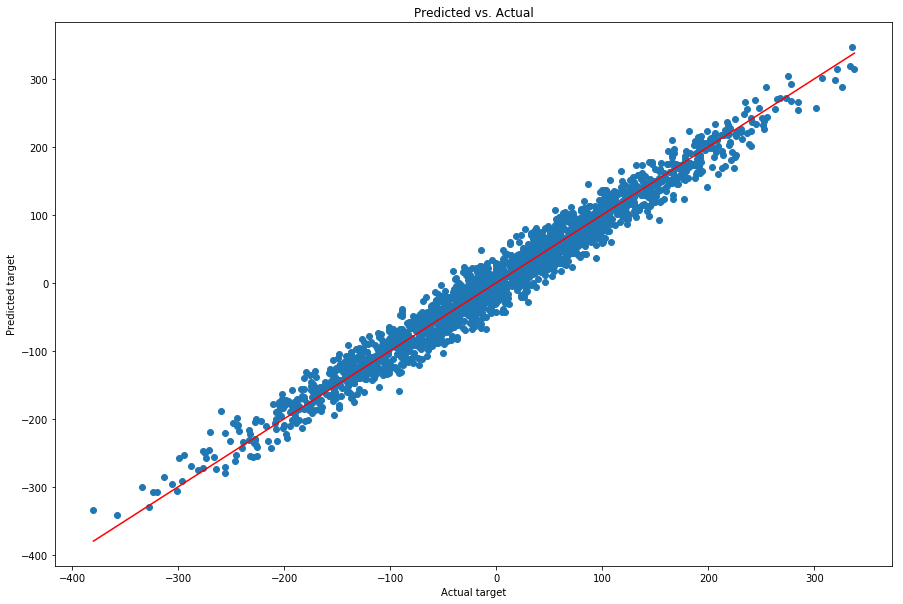

In [291]:
from sklearn.model_selection import cross_val_predict
predicted = cross_val_predict(my_pipeline,X,y,cv=5)
plt.figure(figsize=(15, 10))
print(y.size)
plt.scatter(y, predicted)
plt.title('Predicted vs. Actual')
plt.xlabel('Actual target')
plt.ylabel('Predicted target')
plt.plot([min(y), max(y)], [min(y), max(y)],'r')